# Simulation results for different ways of estimating kappas 

In [2]:
# dependencies
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.path.abspath('..'))

import numpy as np
import torch as pt
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

import HierarchBayesParcel.emissions as em
import HierarchBayesParcel.arrangements as ar
import test_VMF_Mstep as vmf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simulation with true variability in V across subjects
One problem with the old model is that the kappa is calculated always relative to the mean direction of the data, not the estimated V. 
This is ok if the kappa if we are estimating a group kappa and a group V, but for individual kappas we are ignoring the subject-by-subject variance in V. So individual kappas are higher than group kappas, which can become quite bad if the number of partitions is small and the voxel dependent.

Models: 
* M0: Around mean - group 
* M1: Around mean - subject 
* M2: Around V - group 
* M3: Around V- subject

Sig_subject is the SD of the V-vectors across subjects 

<Axes: xlabel='sig_subj', ylabel='kappa'>

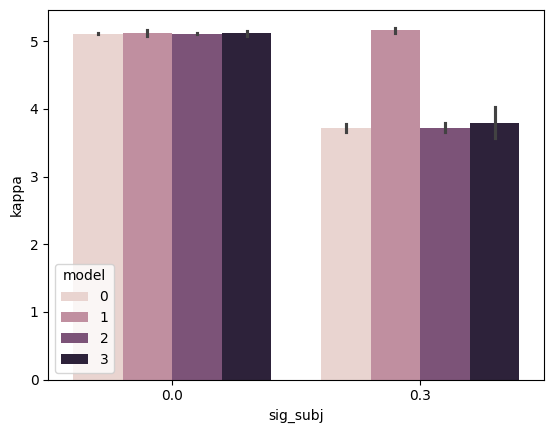

In [3]:
D=vmf.sim_subject_differences()
sb.barplot(data=D,x='sig_subj',y='kappa',hue='model')



## Co-dependenc of voxels

<Axes: xlabel='model', ylabel='kappa'>

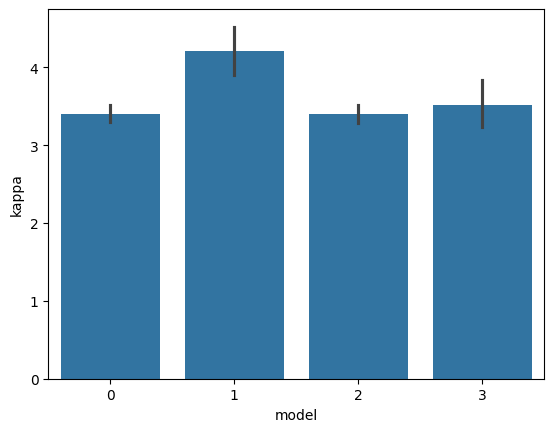

In [21]:
D = vmf.sim_voxel_dependence(P = 5,P_factor = 20,num_subj=5,num_part = 2,kappa= 3)
sb.barplot(data=D,x='model',y='kappa')